In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

df = pd.read_csv('지역화폐 가맹점_20240331.csv',  encoding='cp949')

/var/folders/09/9bnyqv215k92q_njqzl8zzbm0000gn/T/ipykernel_61708/851267235.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('지역화폐 가맹점_20240331.csv',  encoding='cp949')


In [3]:
# 시군명, 업종명(종목명), 업종코드, 휴폐업상태, 휴페업상태 코드, 폐업일자 남기고 다른 column 삭제
# 시군명 -> 각 시마다 어떤 업종이 아직 폐업, 휴업중이 아닌지, 분석 할 수 있음1
# 업종명, 업종 코드 -> 업종 종류를 분류 할 수 있음
# 휴폐업상태 -> 어떤 업종이 휴폐업 상태인지 분류 가능. 그리고 비슷한 업종끼리 묶어서 분류 가능
# 휴폐업 상태 코드는 뭔지 잘 모름. 찾아보니 계속 사업자 1, 휴업자 2, 폐업자 3 그렇다면 휴폐업 상태를 버려도? 코드만 보고 분석 가능. , 정상영업하는 곳은 0으로 처리
# 폐업 일자 -> 폐업일자를 월 별로 묶어 어떤 달에 어떤 업종이 가장 많이 폐업을 했는지 분석 가능
# - 아직 분석을 안해봐서 모르지만 폐업한 업종을 분류해서 어떤 업종은 지역화폐를 사용해도 폐업할 가능성이 높다는 결론을 도출해낼 수도 있음
# - 휴폐업상태를 알 수 있다는게 유의미한 결과가 될 수도??
#  현재 시군별로 있는 지역화폐 가맹점을 위의 연령과 성별, 신규가입자수 등과 비교하면서 어떤 시군에 어떤 지역화폐 가맹점을 늘리면 경제에 유의미한 변화가 생길지 등을 분석할 수 있음
# 업종명이 많은 순서대로 나열해서, 시/군 명과 업종명의 연관성을 분석
# 22년데이터에서 새로 추가된 4천개의 데이터만 뽑아 최근 2년간 어떤 업종이 유행했는지도 분석 가능

In [4]:
# 한글 글꼴 설정 (macOS에서 사용 가능한 한글 글꼴)
font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"  # macOS에서 'AppleGothic' 글꼴을 사용합니다
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [5]:
# 데이터 복사본 만들기
df1 = df.copy()

In [6]:
# 데이터의 행, 열 개수 출력
print('데이터1의 행, 열 개수 : ')
print(df1.shape)

데이터1의 행, 열 개수 : 
(418750, 15)


In [7]:
# 데이터의 구조와 타입(변수 속성)
print('데이터1의 구조와 타입 : ')
print(df1.info())

데이터1의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418750 entries, 0 to 418749
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   시군명       418750 non-null  object 
 1   상호명       418750 non-null  object 
 2   업종명(종목명)  418750 non-null  object 
 3   소재지도로명주소  401510 non-null  object 
 4   소재지지번주소   418750 non-null  object 
 5   우편번호      414011 non-null  float64
 6   위도        410910 non-null  float64
 7   경도        410910 non-null  float64
 8   사업자등록번호   418750 non-null  object 
 9   업종코드      418750 non-null  int64  
 10  가맹점번호     402898 non-null  object 
 11  휴폐업상태     105882 non-null  object 
 12  휴폐업상태코드   105882 non-null  float64
 13  폐업일자      15191 non-null   object 
 14  데이터기준일자   418750 non-null  int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 47.9+ MB
None


In [8]:
# 필요한 변수명 : 시군명, 상호명, 업종명(종목명), 업종코드, 휴폐업상태, 폐업일자, 데이터기준일자
df1 = df1.drop(['소재지도로명주소','소재지지번주소','우편번호', '위도', '경도', '사업자등록번호', '가맹점번호', '휴폐업상태코드'], axis = 1)
df1

,시군명,상호명,업종명(종목명),업종코드,휴폐업상태,폐업일자,데이터기준일자
0,고양시,까망노래연습장,노래방,8402,NaN,NaN,20240331
1,고양시,일산좋은치과의원,치과,4201,NaN,NaN,20240331
2,고양시,잉크존,"문구,사무용품",8102,NaN,NaN,20240331
3,고양시,참좋은집,오양.보육.복지시설,7301,NaN,NaN,20240331
4,고양시,(주)팩토리빈,커피전문점,2502,NaN,NaN,20240331
...,...,...,...,...,...,...,...
418745,화성시,킹(KING),차량부품.용품,6501,NaN,NaN,20240331
418746,화성시,아리가또맘마 중동탄점,일식전문점,2303,NaN,NaN,20240331
418747,화성시,아이티씨영어,기타교육.교습.학원,7213,NaN,NaN,20240331
418748,화성시,다함 목재,기타건축자재,3403,NaN,NaN,20240331


In [9]:
# 데이터의 구조와 타입(변수 속성)
print('데이터1의 구조와 타입 : ')
print(df1.info())

데이터1의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418750 entries, 0 to 418749
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   시군명       418750 non-null  object
 1   상호명       418750 non-null  object
 2   업종명(종목명)  418750 non-null  object
 3   업종코드      418750 non-null  int64 
 4   휴폐업상태     105882 non-null  object
 5   폐업일자      15191 non-null   object
 6   데이터기준일자   418750 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 22.4+ MB
None


- 휴폐업상태에 상당한 결측치가 있음
- 폐업일자에도 상당한 결측치가 있으나, 폐업일자는 폐업에만 해당되기 때문에 다른 전처리 필요 x, 나중에 각 월별로 어떤 달에 가장 많은 업종이 폐업했는지 알아볼 때 써보자
- 사실상 데이터기준일자도 필요 없어보임. drop 해야함.


In [10]:
# 데이터의 결측치 확인
print(('데이터1의 결측치 : '))
df1.isnull().sum()

데이터1의 결측치 : 


시군명              0
상호명              0
업종명(종목명)         0
업종코드             0
휴폐업상태       312868
폐업일자        403559
데이터기준일자          0
dtype: int64

### 시군명 전처리

In [11]:
print(df1['시군명'].unique(), '\n')
print(df1['시군명'].describe())

['고양시' '가평군' '부천시' '동두천시' '과천시' '광명시' '광주시' '구리시' '군포시' '김포시' '남양주시' '성남시'
 '시흥시' '안산시' '이천시' '용인시' '파주시' '평택시' '화성시' '수원시' '안성시' '안양시' '양주시' '양평군'
 '여주시' '연천군' '오산시' '의왕시' '의정부시' '포천시' '하남시'] 

count     418750
unique        31
top          수원시
freq       37487
Name: 시군명, dtype: object


### 업종명(종목명) 전처리

In [12]:
#업종명(종목명)을 '업종명'으로 바꾸기
df1 = df1.rename(columns={'업종명(종목명)':'업종명'})

In [13]:
print(df1['업종명'].describe(), '\n')
print(df1['업종명'].unique())

count     418750
unique       221
top        일반음식점
freq      106029
Name: 업종명, dtype: object 

['노래방' '치과' '문구,사무용품' '오양.보육.복지시설' '커피전문점' '화장품' '세탁업' '기타교육.교습.학원'
 '기타취미.레저.스포츠' '피부.체형미관리' '기타건축자재' '편의점' '축산물,정육점' '입시학원,보습학원' '전문스포츠용품점'
 '미용실(두발전문)' '일반음식점' '기타식음료품' '예체능계열학원' '약국' '기타음식점' '건강보조식품' '일식전문점'
 '자동차정비' '정형외과' '광고기획.대행업' '일반주점' '차량부품.용품' '기타' '무수도장 등(학원)' '한의원'
 '식음료(기타)' '서적(출판)' '당구장' '가구판매점' '헬스클럽' '조명기구.전기' '이비인후과' '기타잡화'
 '실내장식(인테리어)' '자전거' '통신.방문판매' '화원.화초' '기타오락.휴식시설' '기타수리.수선전문' '기타서비스'
 '치킨전문점' '기타약품.의료기기' '서양식전문점' '침구및수예품' '기타가정.주방용품' '중고품판매점' '통신기기'
 '기타레저,스포츠용품' '산부인과' '중식전문점' '애완동물,용품(수족관)' '기타전문서비스' '미용재료' '농산물,청과물'
 '세무전문서비스' '일반의류' '기타종합소매점' '주류전문점' '한약방' '안경.광학제품' '외국어학원' '세차장' '악기판매점'
 '기타사무용기기' '동물병원' '내과' '자동차운전학원' '내의류' '슈퍼마켓.마트' '완구' '피부과' '컴퓨터및소프트웨어'
 '판촉물.인쇄.복사' '제과.제빵' '커튼.카펫.수건' '사진관.현상소' '수산물,건어물' '차량임대 (렌터카)' '패스트푸드점'
 '기타상품판매점' '인터넷상거래' '교육및교구' '정수기.비데' '아동.유아복' '기술.직업훈력학원' '민예품.공예품'
 '아이스크림전문점' '타이어판매점' '성형외과' '가전제품' '골프연습장' '스포츠용품점' '소아과' '양복점.

In [14]:
# 업종명_카테고리 파생변수
def categorize_business(business_name):
    if business_name in ['기타식음료품', '일반음식점', '기타음식점', '커피전문점', '치킨전문점', '서양식전문점', '중식전문점', '일식전문점', '패스트푸드점', '아이스크림전문점', '제과.제빵', '주류전문점', '건강보조식품', '농산물,청과물', '수산물,건어물', '축산물,정육점', '뷔페/출장연회', '카페/베이커리', '기타식음료품']:
        return '음식 및 음료'
    elif business_name in ['기타교육.교습.학원', '입시학원,보습학원', '예체능계열학원', '외국어학원', '기술.직업훈련학원', '자동차운전학원', '무수도장 등(학원)', '교육서비스업', '초중고등학교', '대학교.대학원', '유치원']:
        return '교육 및 학원'
    elif business_name in ['치과', '피부과','신경정신과', '정형외과', '이비인후과', '산부인과', '소아과', '성형외과', '내과', '한의원', '한약방', '약국', '요양병원', '동물병원', '기타의료업', '일반병원', '종합병원', '한방병원', '오양.보육.복지시설']:
        return '의료 및 보건'
    elif business_name in ['헬스클럽', '골프연습장', '스포츠용품점', '기타레저,스포츠용품', '골프장', '종합레저타운', '기타취미.레저.스포츠']:
        return '레저 및 스포츠'
    elif business_name in ['기타종합소매점', '문구,사무용품', '가전제품', '가구판매점', '조명기구.전기', '악기판매점', '안경.광학제품', '컴퓨터및소프트웨어', '판촉물.인쇄.복사', '사진관.현상소', '카메라.캠코더', '시계.귀금속', '선물용품점', '서적(출판)', '농협식품전문점', '인삼전문점', '의류관련(기타)', '완구', '구두.신발', '가방.핸드백', '침구및수예품', '의류/잡화/안경', '가방.핸드백', '비디오.음반', '편의점/슈퍼/마트', '대형할인점', '체인스토어', '오픈마켓', '인터넷상거래', '슈퍼마켓.마트', '철재,사무용가구', '기타상품판매점', '기타가정.주방용품', '중고품판매점', '민예품.공예품', '농산물,청과물', '수산물,건어물', '축산물,정육점', '악기판매점', '구두.신발', '가방.핸드백']:
        return '소매업'
    elif business_name in ['기타서비스', '세탁업', '차량임대 (렌터카)', '웨딩토탈서비스', '여행지원서비스', '택배서비스', '대리운전', '택시', '여행사', '기타서비스', '광고기획.대행업', '기타전문서비스', '기타대인서비스', '점술업', '기타수리.수선전문', '통신.방문판매', '이사/화물운송업', '대리운전', '기타교육.교습.학원', '부동산중개', '법무전문서비스', '세무전문서비스', '경비업', '요양병원', '각종단체회비', '기타가례서비스', '기타부동산관련업', '법무전문서비스', '기부금', '공공편의서비스', '기타요금', '기타보험']:
        return '서비스업'
    elif business_name in ['자동차정비', '차량부품.용품', '차량견인서비스', '자동차(국산신차)', '자동차(수입신차)', '자동차(중고차)', '오토바이', '타이어판매점', '주차장.폐차장', '기타운송기구', '자동차/자전거', '차량부품.용품']:
        return '차량 관련'
    elif business_name in ['실내장식(인테리어)', '기타건축자재', '가구판매점', '커튼.카펫.수건', '조명기구.전기', '보일러,펌프,샷시', '가전제품', '주방/가정/인테리어', '수집품,기념품', '가전/통신']:
        return '주택 및 인테리어'
    elif business_name in ['통신.방문판매', '통신기기', '교복', '철도', '여객선', '시내버스','항공사']:
        return '교통 및 통신'
    elif business_name in ['노래방', '당구장', '영화.공연장','오락실/PC방', '사우나.목욕탕.찜질방', '기타오락.휴식시설', '골프연습장', '골프장', '체인스토어', '레저용 숙박업소', '스포츠용품점', '전문스포츠용품점', '기타레저,스포츠용품']:
        return '오락 및 여가'
    elif business_name in ['미용실(두발전문)','미용재료', '피부.체형미관리', '세탁업',  '가발', '건강보조식품', '미용/뷰티/위생', '화장품']:
        return '미용 및 건강'
    elif business_name in ['기타연료판매', '화원.화초', '화방.표구점', '수집품,기념품', '유흥.사치용품', '기타상품판매점', '기타대인서비스', '기타사무용기기']:
        return '기타'
    else:
        return '기타'

# 새로운 파생변수 '업종명_카테고리' 생성
df1['업종명_카테고리'] = df1['업종명'].apply(categorize_business)

df1

,시군명,상호명,업종명,업종코드,휴폐업상태,폐업일자,데이터기준일자,업종명_카테고리
0,고양시,까망노래연습장,노래방,8402,NaN,NaN,20240331,오락 및 여가
1,고양시,일산좋은치과의원,치과,4201,NaN,NaN,20240331,의료 및 보건
2,고양시,잉크존,"문구,사무용품",8102,NaN,NaN,20240331,소매업
3,고양시,참좋은집,오양.보육.복지시설,7301,NaN,NaN,20240331,의료 및 보건
4,고양시,(주)팩토리빈,커피전문점,2502,NaN,NaN,20240331,음식 및 음료
...,...,...,...,...,...,...,...,...
418745,화성시,킹(KING),차량부품.용품,6501,NaN,NaN,20240331,차량 관련
418746,화성시,아리가또맘마 중동탄점,일식전문점,2303,NaN,NaN,20240331,음식 및 음료
418747,화성시,아이티씨영어,기타교육.교습.학원,7213,NaN,NaN,20240331,교육 및 학원
418748,화성시,다함 목재,기타건축자재,3403,NaN,NaN,20240331,주택 및 인테리어


In [15]:
# 시군명과 업종명으로 crosstab 테이블 생성
crosstab_table = pd.crosstab(index=df1['업종명_카테고리'], columns=df1['시군명'])

# 모든 행과 열을 표시하도록 설정
pd.set_option('display.max_rows', None)   # 모든 행 표시
pd.set_option('display.max_columns', None) # 모든 열 표시
pd.set_option('display.width', None)       # 자동 너비 조정
pd.set_option('display.max_colwidth', None) # 모든 열 너비 표시

# crosstab 테이블 출력
print(crosstab_table.shape)
crosstab_table

(12, 31)


시군명,가평군,고양시,과천시,광명시,광주시,구리시,군포시,김포시,남양주시,동두천시,부천시,성남시,수원시,시흥시,안산시,안성시,안양시,양주시,양평군,여주시,연천군,오산시,용인시,의왕시,의정부시,이천시,파주시,평택시,포천시,하남시,화성시
업종명_카테고리,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
교육 및 학원,91,3462,258,1227,1026,643,876,1704,2698,163,2504,2670,4132,1966,1535,497,1922,924,236,221,69,736,4073,396,1304,688,1703,2071,236,1211,4246
교통 및 통신,15,90,0,1,50,34,37,65,103,24,163,0,169,0,117,39,78,39,14,31,15,35,111,0,84,49,48,0,42,30,61
기타,469,3293,394,2038,1615,898,921,2526,2493,509,3552,4632,4831,6290,3028,1199,2103,1303,739,767,339,910,3501,648,1914,1319,2175,5580,1058,1097,3478
레저 및 스포츠,79,947,101,552,309,184,234,505,627,69,653,796,1104,545,591,209,522,233,114,139,40,245,950,189,348,237,441,1245,178,392,979
미용 및 건강,161,2774,173,1216,955,711,785,1024,2118,353,2873,2029,3984,4,2095,569,1770,798,283,347,108,646,2359,389,1470,752,1287,2728,395,822,2490
서비스업,99,1237,88,379,464,315,372,956,966,171,1392,27,1848,3,1023,357,721,431,172,277,109,290,1373,122,799,396,777,851,296,380,1166
소매업,229,1881,159,665,795,444,523,1006,1392,271,2119,1620,2735,4,1902,587,1141,668,332,361,157,517,1718,181,1011,645,1211,1597,625,569,1806
오락 및 여가,250,568,0,8,256,147,168,247,420,79,606,2,882,1,683,215,393,209,121,124,65,190,635,1,297,200,379,24,197,155,541
음식 및 음료,1705,10037,665,3579,4721,2348,2812,5120,8065,1408,9889,6574,15196,5906,8234,3316,6885,4308,2067,2029,1083,2939,10470,1312,5227,3404,6757,12063,2962,3657,10852


### 업종코드 전처리 - X

### 휴폐업상태 전처리

In [16]:
df1['휴폐업상태'].unique()

array([nan, '계속사업자', '폐업자', '휴업자'], dtype=object)

In [17]:
# 휴폐업상태 Nan값 '계속사업자'로 치환 : 문의해봄
df1['휴폐업상태'] = df1['휴폐업상태'].fillna('계속사업자')

#df1

### 폐업일자 전처리

In [18]:
print(df1['폐업일자'].describe())
print(df1['폐업일자'].dtypes)

count          15191
unique          1264
top       2023-12-31
freq             293
Name: 폐업일자, dtype: object
object


In [19]:
# YYYYMMDD형식으로 바꾸기
df1['폐업일자'] = pd.to_datetime(df1['폐업일자'], errors='coerce').dt.strftime('%Y%m%d')
print(df1['폐업일자'].describe())
print(df1['폐업일자'].dtypes)

count        15191
unique        1264
top       20231231
freq           293
Name: 폐업일자, dtype: object
object


### 데이터 기준 일자 전처리

In [20]:
print(df1['데이터기준일자'].unique())

#결측치확인
print(df1['데이터기준일자'].isna().sum())

[20240331]
0


# 시군별 상점 총 개수 확인 및 시각화

In [21]:
업종별_개수 = df1.groupby(['시군명', '업종명_카테고리']).size().reset_index(name='개수')

# 시군명별 총 업종 개수 구하기
시군별_업종수 = 업종별_개수.groupby('시군명')['개수'].sum().reset_index()

# 가장 많은 업종을 가진 상위 5개 시군명 추출
상위5개_시군명 = 시군별_업종수.nlargest(5, '개수')['시군명']

# 상위 5개 시군명에 대해 업종별 개수 필터링
상위5개_업종별_개수 = 업종별_개수[업종별_개수['시군명'].isin(상위5개_시군명)]

df1_count = 시군별_업종수.sort_values(by = '시군명') #(상점 수)
df1_count

,시군명,개수
0,가평군,3354
1,고양시,26672
2,과천시,2032
3,광명시,10594
4,광주시,11204
5,구리시,6281
6,군포시,7370
7,김포시,14833
8,남양주시,20531
9,동두천시,3308


In [22]:
시군별_업종수_상위 = 시군별_업종수.sort_values(by = '개수', ascending = False).head(5)
시군별_업종수_상위

,시군명,개수
12,수원시,37487
27,평택시,28535
22,용인시,27909
30,화성시,27663
1,고양시,26672


In [23]:
시군별_업종수_하위 = 시군별_업종수.sort_values(by = '개수').head(5)
시군별_업종수_하위

,시군명,개수
2,과천시,2032
20,연천군,2169
9,동두천시,3308
0,가평군,3354
23,의왕시,3574


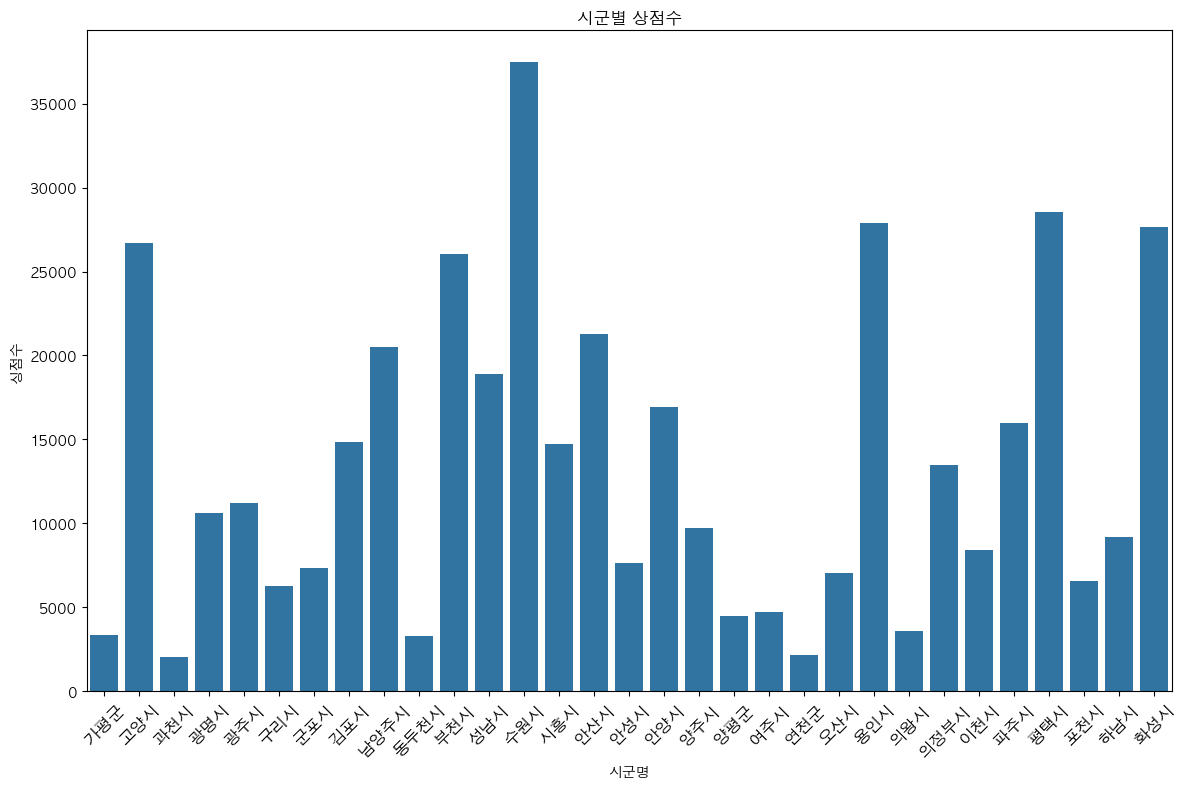

In [24]:
# 시군별_업종수_최종 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
mpl.rc('font', family = 'AppleGothic')


plt.figure(figsize=(12, 8))
sns.barplot(data=시군별_업종수, x='시군명', y='개수')
plt.title('시군별 상점수')
plt.xlabel('시군명')
plt.ylabel('싱점수')
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

### 2022년도와의 비교

In [25]:
df2022 = pd.read_csv('지역화폐가맹점현황_20221231.csv',  encoding='cp949')
df2022 = df2022.drop(['소재지도로명주소','소재지지번주소','우편번호', '위도', '경도', '사업자등록번호', '가맹점번호', '휴폐업상태코드'], axis = 1)

업종별_개수 = df2022.groupby(['시군명', '업종명(종목명)']).size().reset_index(name='개수')

# 시군명별 총 업종 개수 구하기
시군별_업종수 = 업종별_개수.groupby('시군명')['개수'].sum().reset_index()

# 가장 많은 업종을 가진 상위 5개 시군명 추출
상위5개_시군명 = 시군별_업종수.nlargest(5, '개수')['시군명']

# 상위 5개 시군명에 대해 업종별 개수 필터링
상위5개_업종별_개수 = 업종별_개수[업종별_개수['시군명'].isin(상위5개_시군명)]

df2022_count = 시군별_업종수.sort_values(by = '시군명')#(상점 수)
df2022_count

/var/folders/09/9bnyqv215k92q_njqzl8zzbm0000gn/T/ipykernel_61708/3432394065.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df2022 = pd.read_csv('지역화폐가맹점현황_20221231.csv',  encoding='cp949')


,시군명,개수
0,가평군,3553
1,고양시,27042
2,과천시,1469
3,광명시,8745
4,광주시,11974
5,구리시,6751
6,군포시,8348
7,김포시,15668
8,남양주시,20709
9,동두천시,3554


In [26]:
# 차이 계산 (2024년도 상점 개수 - 2022년도 상점 개수)
# 데이터 합치기
df_store_count = pd.merge(df1_count, df2022_count, on = '시군명', how='right')

# 항목명 변경
df_store_count = df_store_count.rename(columns={'개수_x':'2024개수', '개수_y':'2022개수'})

# 차이 계산 파생변수 만들기
df_store_count['증가분'] = df_store_count['2024개수']-df_store_count['2022개수']
df_store_count = df_store_count.sort_values(by='증가분', ascending = False)
df_store_count

,시군명,2024개수,2022개수,증가분
27,평택시,28535,20078,8457
12,수원시,37487,35465,2022
3,광명시,10594,8745,1849
17,양주시,9736,7895,1841
30,화성시,27663,26308,1355
13,시흥시,14727,13375,1352
26,파주시,15986,14784,1202
22,용인시,27909,27146,763
16,안양시,16937,16178,759
2,과천시,2032,1469,563


/Users/heohyeonjun/anaconda3/envs/tf29_py39/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/heohyeonjun/anaconda3/envs/tf29_py39/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


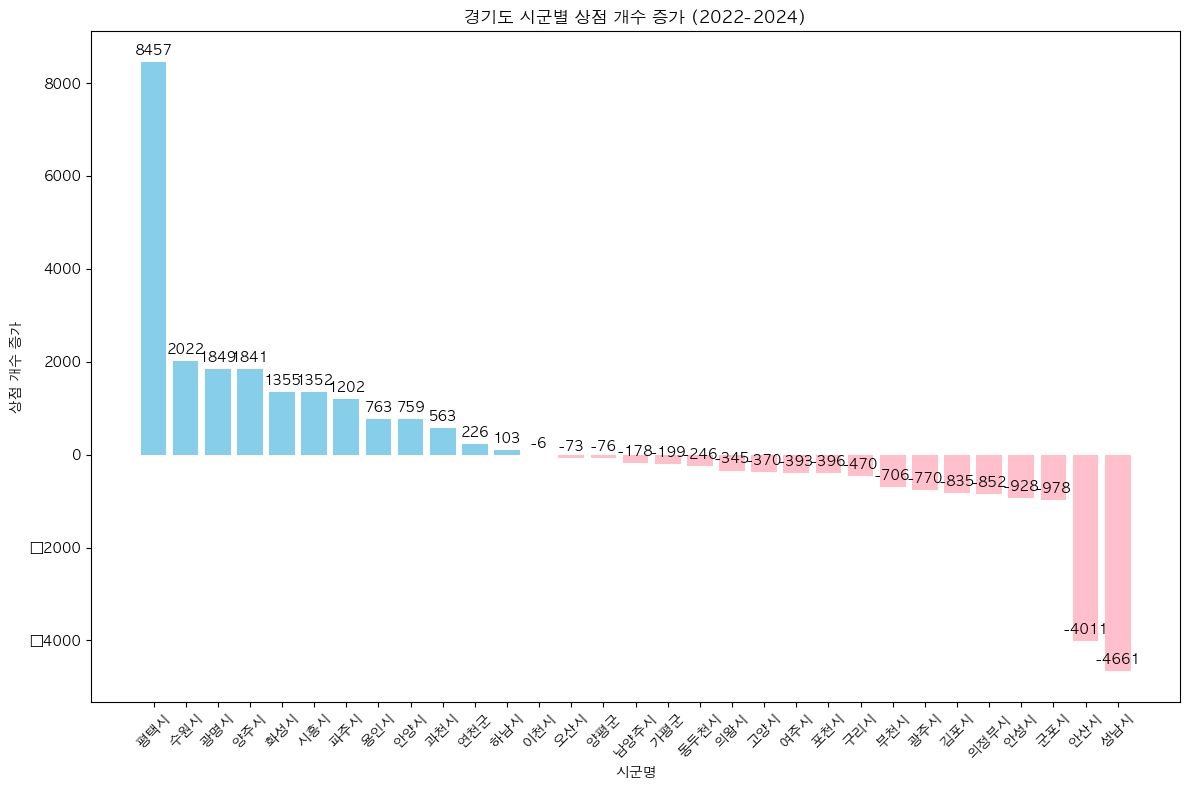

In [27]:
# 증가 그래프
# 지도 시각화를 하면 좋을텐데..

# 그래프 설정
fig, ax = plt.subplots(figsize=(12, 8))

# 막대 그래프 생성
bars = ax.bar(df_store_count['시군명'], df_store_count['증가분'], color=['pink' if x < 0 else 'skyblue' for x in df_store_count['증가분']])

# 값 표시
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# 제목 및 라벨 설정
ax.set_title('경기도 시군별 상점 개수 증가 (2022-2024)')
ax.set_xlabel('시군명')
ax.set_ylabel('상점 개수 증가')

# 그래프 보여주기
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2024데이터에서 (수원시-평택시)의 차이 역시 클 정도로 수원시가 압도적인 1위.
하지만 성장률을 보았을 때 평택시가 두드러짐. 2022~2024년도 사이에 무슨일이 있었을까..
오히려 수원시의 지원금이 늘고 평택시는 줄었던 것을 보았을 때, 지원금과 연관성이 없나?

필요한 자료조사 :
1. 수원페이, 평택 지역화폐 특징 비교
2. 수원시 경제 규모가 큰 이유 - 첨단산업 일자리 집중(?)

# 시군별 상위 5개 업종명 확인 및 시각화 (원형, 막대)

In [28]:
# 시군명을 리스트로 저장
city_county_names = df1['시군명'].unique().tolist()

# 특정 시군명의 상위 10개 업종명을 계산하는 함수
def get_top_10_industries_by_city(index):
    city_name = city_county_names[index]
    filtered_df = df1[df1['시군명'] == city_name]
    industry_count = filtered_df['업종명_카테고리'].value_counts()
    top_10_industry_count = industry_count.nlargest(5)
    return top_10_industry_count

In [29]:
import matplotlib.pyplot as plt

def plot_top_10_industries_by_city(index):
    # 특정 시군명의 상위 5개 업종명을 계산
    top_10_industries = get_top_10_industries_by_city(index)
    
    city_name = city_county_names[index]
    
    # 서브플롯 설정: 1행 2열, 가로로 배치
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1행 2열, 화면 크기 조정
    
    # 원 그래프
    axes[0].pie(top_10_industries, labels=top_10_industries.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    axes[0].set_title(f"{city_name} 상위 10개 업종명 비율")
    axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    # 막대 그래프
    axes[1].bar(top_10_industries.index, top_10_industries, color='skyblue')
    axes[1].set_xlabel('업종명_카테고리')
    axes[1].set_ylabel('Count')
    axes[1].set_title(f"{city_name} 상위 10개 업종명 개수")
    axes[1].tick_params(axis='x', rotation=45)  # X축 레이블 회전

    plt.tight_layout()  # 플롯 간격 자동 조정
    plt.show()

In [30]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 19  # 원하는 시군명의 인덱스 번호 / index 20 : 수원시
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

City/County: 수원시
음식 및 음료    15196
기타          4831
교육 및 학원     4132
미용 및 건강     3984
소매업         2735
Name: 업종명_카테고리, dtype: int64


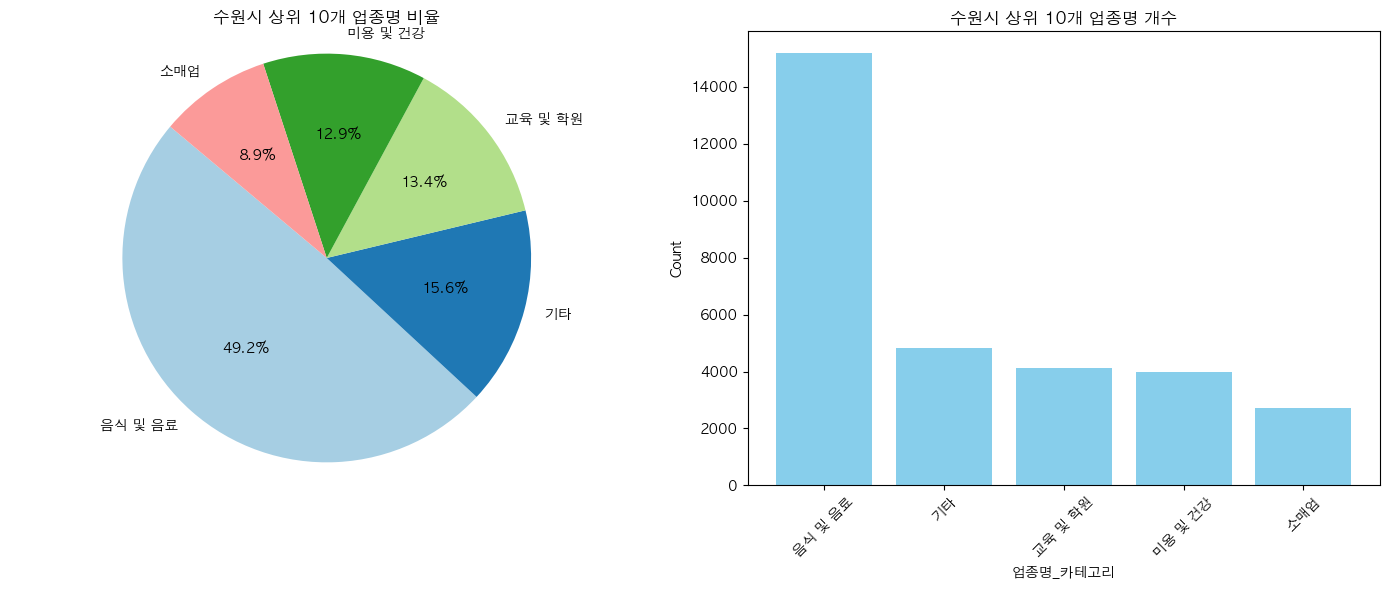

In [31]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_10_industries_by_city(index)

City/County: 평택시
음식 및 음료    12063
기타          5580
미용 및 건강     2728
교육 및 학원     2071
소매업         1597
Name: 업종명_카테고리, dtype: int64


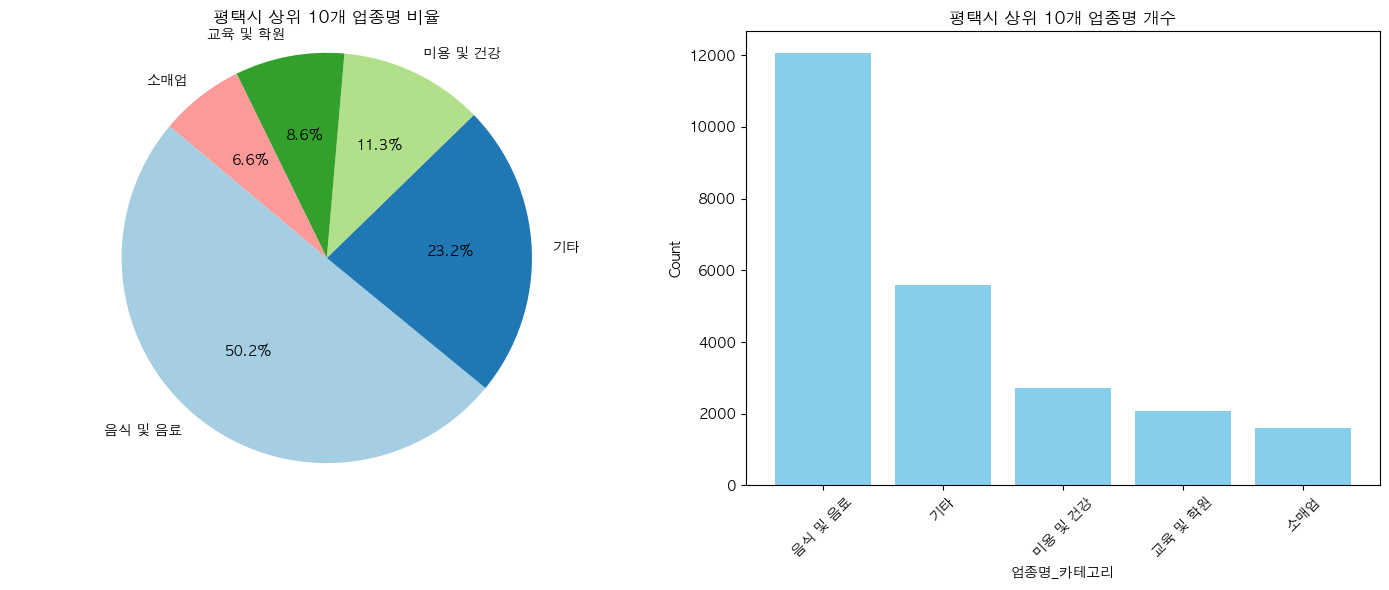

In [32]:
index = 17  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 용인시
음식 및 음료    10470
교육 및 학원     4073
기타          3501
미용 및 건강     2359
소매업         1718
Name: 업종명_카테고리, dtype: int64


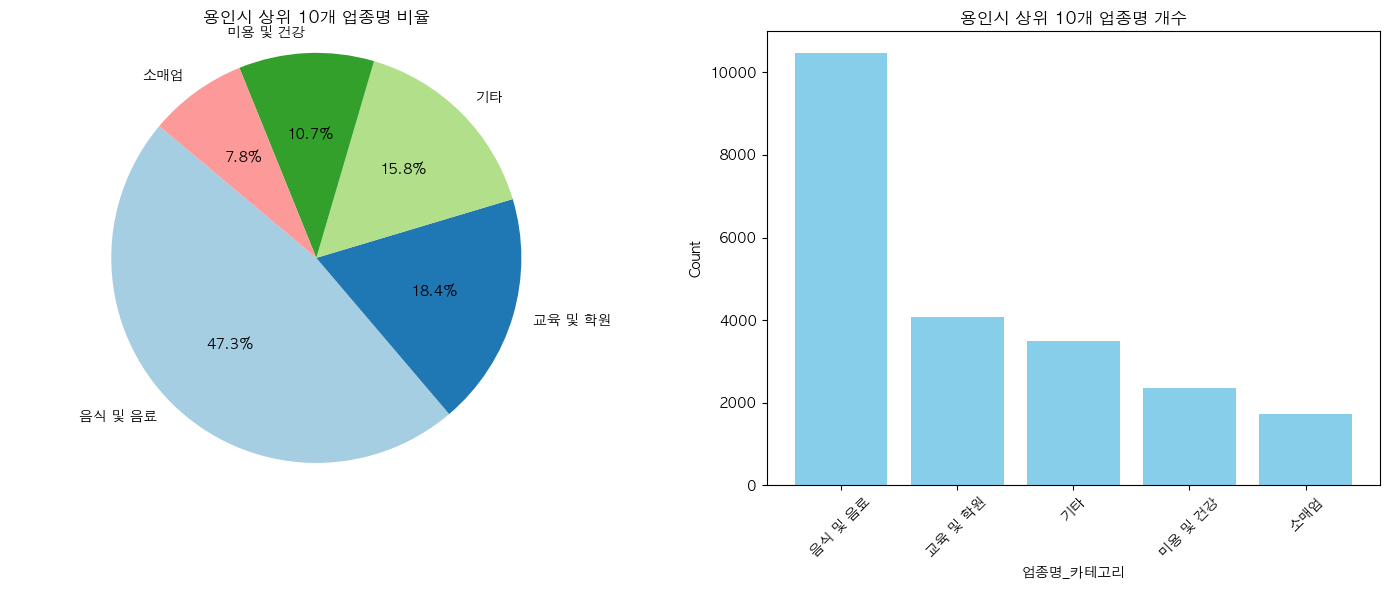

In [33]:
index = 15  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 화성시
음식 및 음료    10852
교육 및 학원     4246
기타          3478
미용 및 건강     2490
소매업         1806
Name: 업종명_카테고리, dtype: int64


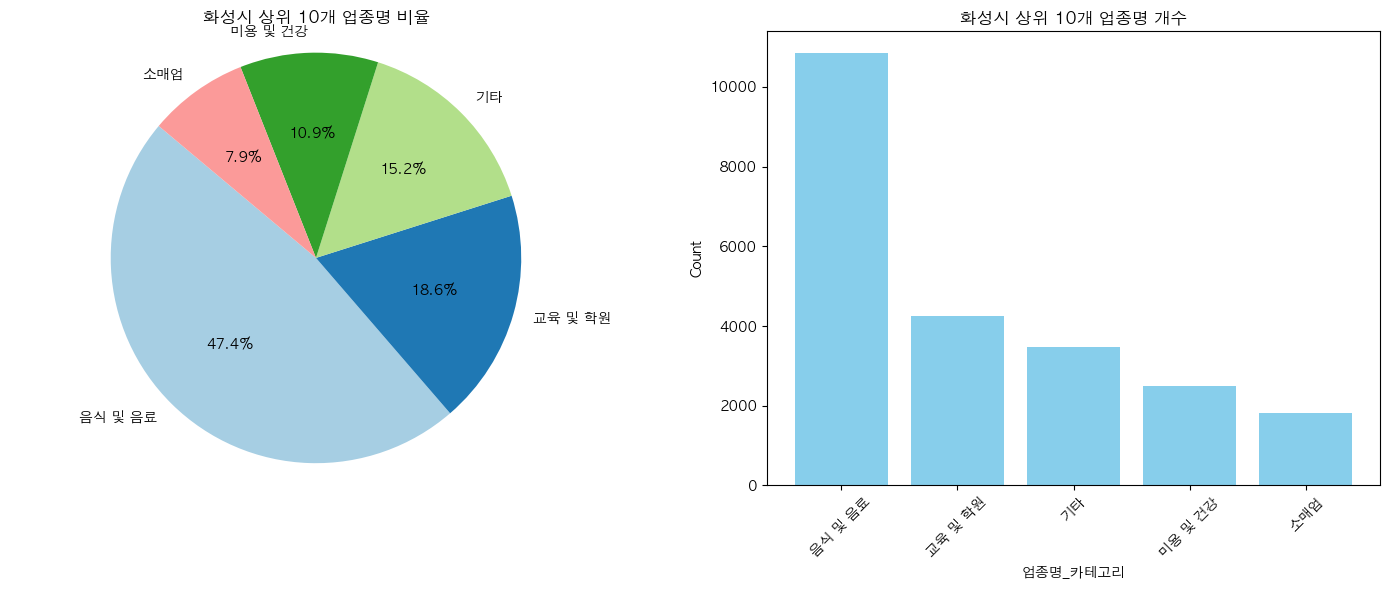

In [34]:
index = 18  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

City/County: 고양시
음식 및 음료    10037
교육 및 학원     3462
기타          3293
미용 및 건강     2774
소매업         1881
Name: 업종명_카테고리, dtype: int64


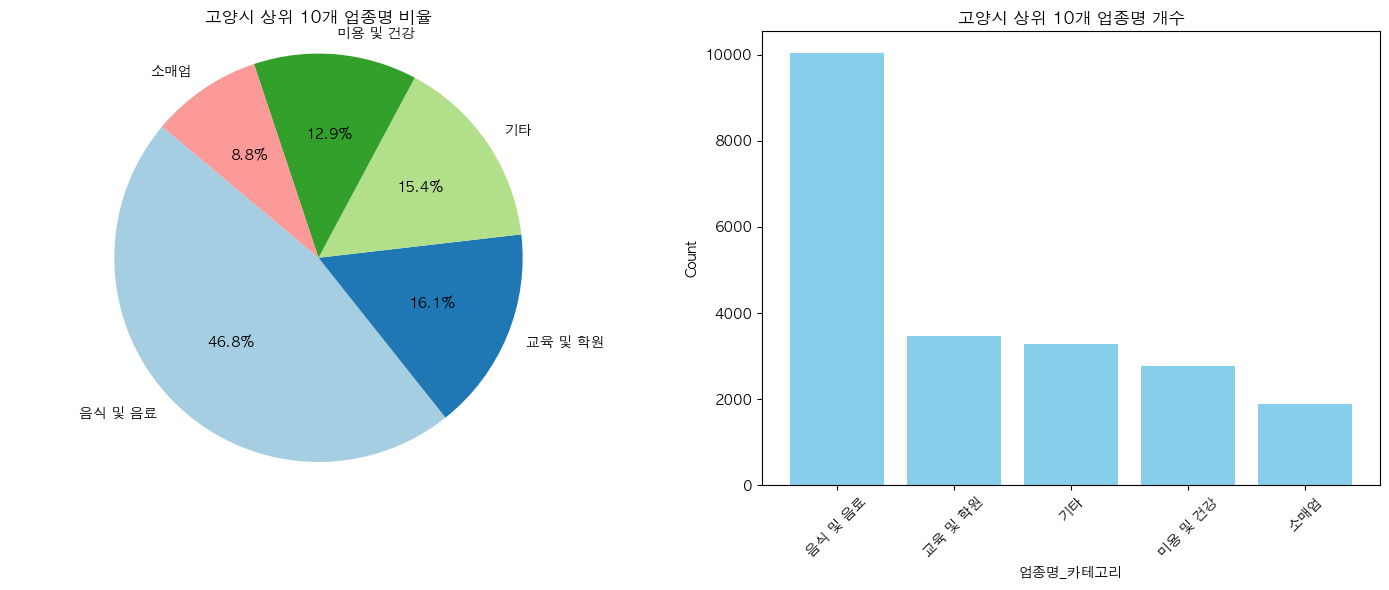

In [35]:
index = 0  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_10_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_top_10_industries_by_city(index)

Top5 시군들의 큰 차이는 없음. 
그 중 용인시,화성시가 ‘교육 및 학원’ 비중이 높음 (18.4% ,18.6%)

필요한 자료조사
:why? - 용인시 화성시의 특징

# 하위 5개도 해보자.

In [36]:
# 하위 5개 추출 하는 함수
def get_bottom_5_industries_by_city(index):
    city_name = city_county_names[index]
    filtered_df = df1[df1['시군명'] == city_name]
    industry_count = filtered_df['업종명_카테고리'].value_counts()
    bottom_5_industry_count = industry_count.nsmallest(5)
    return bottom_5_industry_count

In [37]:
# 시각화
def plot_bottom_5_industries_by_city(index):
    # 특정 시군명의 하위 5개 업종명을 계산
    bottom_5_industries = get_bottom_5_industries_by_city(index)
    
    city_name = city_county_names[index]
    
    # 서브플롯 설정: 1행 2열, 가로로 배치
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1행 2열, 화면 크기 조정
    
    # 원 그래프
    axes[0].pie(bottom_5_industries, labels=bottom_5_industries.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    axes[0].set_title(f"{city_name} 하위 5개 업종명 비율")
    axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    # 막대 그래프
    axes[1].bar(bottom_5_industries.index, bottom_5_industries, color='skyblue')
    axes[1].set_xlabel('업종명_카테고리')
    axes[1].set_ylabel('Count')
    axes[1].set_title(f"{city_name} 하위 5개 업종명 개수")
    axes[1].tick_params(axis='x', rotation=45)  # X축 레이블 회전

    plt.tight_layout()  # 플롯 간격 자동 조정
    plt.show()

City/County: 과천시
주택 및 인테리어     23
차량 관련         32
서비스업          88
레저 및 스포츠     101
의료 및 보건      139
Name: 업종명_카테고리, dtype: int64


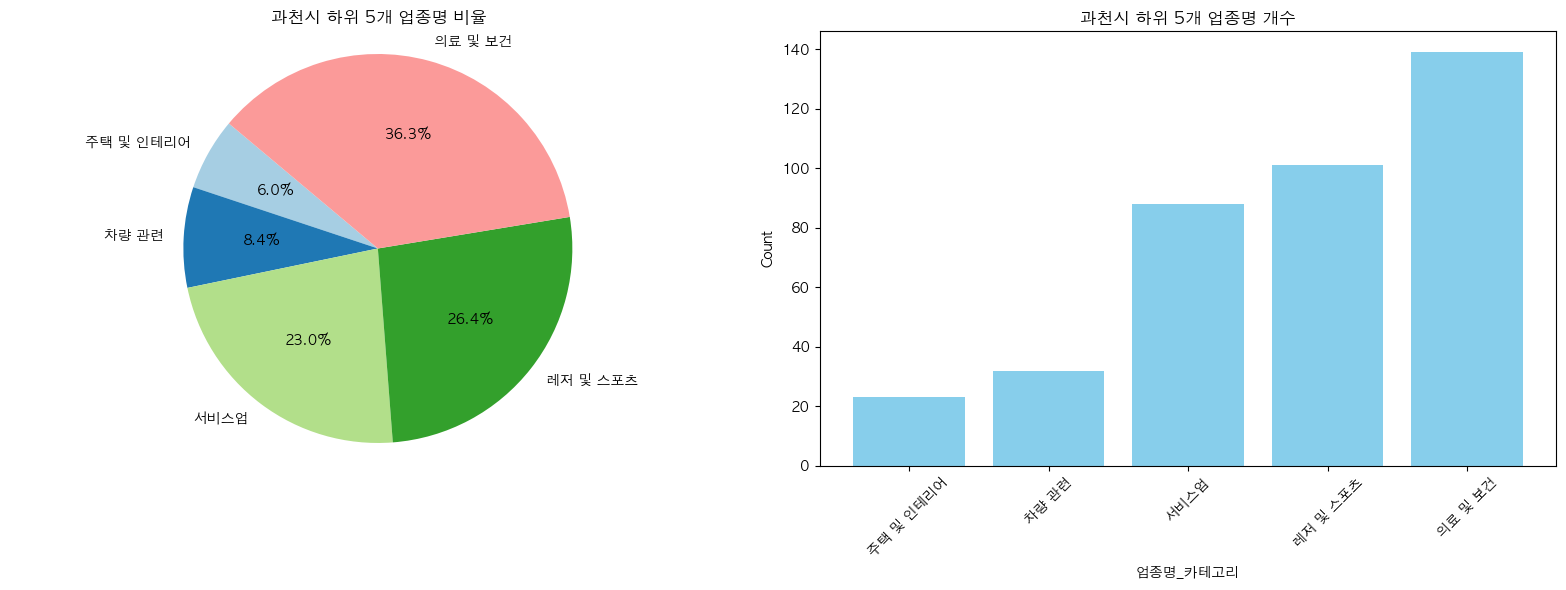

In [38]:
index = 4  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_bottom_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_bottom_5_industries_by_city(index)

City/County: 연천군
교통 및 통신      15
레저 및 스포츠     40
의료 및 보건      59
주택 및 인테리어    62
차량 관련        63
Name: 업종명_카테고리, dtype: int64


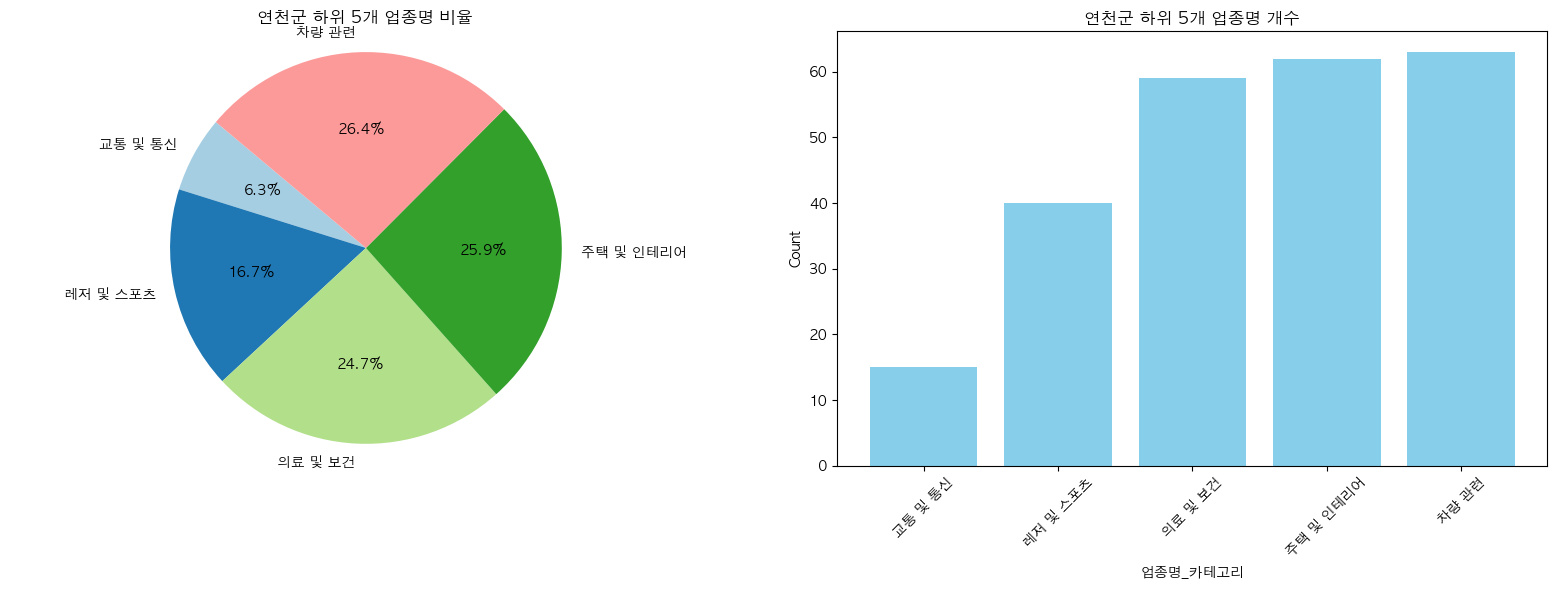

In [39]:
index = 25  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_bottom_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

plot_bottom_5_industries_by_city(index)

### 아무리 봐도 하위 5개는 할 필요가 없어보임.

확실히 낙후된 지역이라서 의료 및 보건 / 교통이 부실함

- 이제 휴/폐업이 전적이 없는 데이터만 뽑아 시각화를 해보자.
- 휴/폐업 전적이 있는 데이터만 뽑아 시각화를 해보자.

In [40]:
df1.head()

,시군명,상호명,업종명,업종코드,휴폐업상태,폐업일자,데이터기준일자,업종명_카테고리
0,고양시,까망노래연습장,노래방,8402,계속사업자,NaN,20240331,오락 및 여가
1,고양시,일산좋은치과의원,치과,4201,계속사업자,NaN,20240331,의료 및 보건
2,고양시,잉크존,"문구,사무용품",8102,계속사업자,NaN,20240331,소매업
3,고양시,참좋은집,오양.보육.복지시설,7301,계속사업자,NaN,20240331,의료 및 보건
4,고양시,(주)팩토리빈,커피전문점,2502,계속사업자,NaN,20240331,음식 및 음료


In [41]:
# '휴폐업상태'가 '계속사업자'인 데이터만 필터링하여 df2에 저장
df2 = df1[df1['휴폐업상태'] == '계속사업자']

# df2 확인
print(df2.shape)
df2.head()

(403391, 8)


,시군명,상호명,업종명,업종코드,휴폐업상태,폐업일자,데이터기준일자,업종명_카테고리
0,고양시,까망노래연습장,노래방,8402,계속사업자,NaN,20240331,오락 및 여가
1,고양시,일산좋은치과의원,치과,4201,계속사업자,NaN,20240331,의료 및 보건
2,고양시,잉크존,"문구,사무용품",8102,계속사업자,NaN,20240331,소매업
3,고양시,참좋은집,오양.보육.복지시설,7301,계속사업자,NaN,20240331,의료 및 보건
4,고양시,(주)팩토리빈,커피전문점,2502,계속사업자,NaN,20240331,음식 및 음료


In [42]:
df2.describe()

,업종코드,데이터기준일자
count,403391.000000,403391.0
mean,3767.926005,20240331.0
std,2495.583416,0.0
min,1000.000000,20240331.0
25%,2301.000000,20240331.0
50%,2302.000000,20240331.0
75%,5602.000000,20240331.0
max,9906.000000,20240331.0


## 계속사업자 기준 시군명 별 상위 5개 시각화

In [43]:
# 시군명을 리스트로 저장
city_county_names = df2['시군명'].unique().tolist()

# 특정 시군명의 상위 5개 업종명을 계산하는 함수
def get_top_5_industries_by_city(index):
    city_name = city_county_names[index]
    filtered_df = df1[df1['시군명'] == city_name]
    industry_count = filtered_df['업종명_카테고리'].value_counts()
    top_5_industry_count = industry_count.nlargest(5)
    return top_5_industry_count

In [44]:
#### 이거 위에꺼랑 똑같이 했는데 왜 이렇게 됐을까
#서브플롯 설정 부터 바꾼건디#

In [45]:
import matplotlib.pyplot as plt

def plot_top_5_industries_by_city(index):
    # 특정 시군명의 상위 5개 업종명을 계산
    top_5_industries = get_top_5_industries_by_city(index)
    
    city_name = city_county_names[index]
    
    # 서브플롯 설정: 1행 2열, 가로로 배치
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1행 2열, 화면 크기 조정
    
    # 원 그래프
    axes[0].pie(top_5_industries, labels=top_5_industries.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    axes[0].set_title(f"{city_name} 상위 5개 업종명 비율(계속사업자)")
    axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    # 막대 그래프
    axes[1].bar(top_5_industries.index, top_5_industries, color='skyblue')
    axes[1].set_xlabel('업종명')
    axes[1].set_ylabel('Count')
    axes[1].set_title(f"{city_name} 상위 5개 업종명 개수(계속사업자)")
    axes[1].tick_params(axis='x', rotation=45)  # X축 레이블 회전

    plt.tight_layout()  # 플롯 간격 자동 조정
    plt.show()

In [46]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 19  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

City/County: 수원시
음식 및 음료    15196
기타          4831
교육 및 학원     4132
미용 및 건강     3984
소매업         2735
Name: 업종명_카테고리, dtype: int64


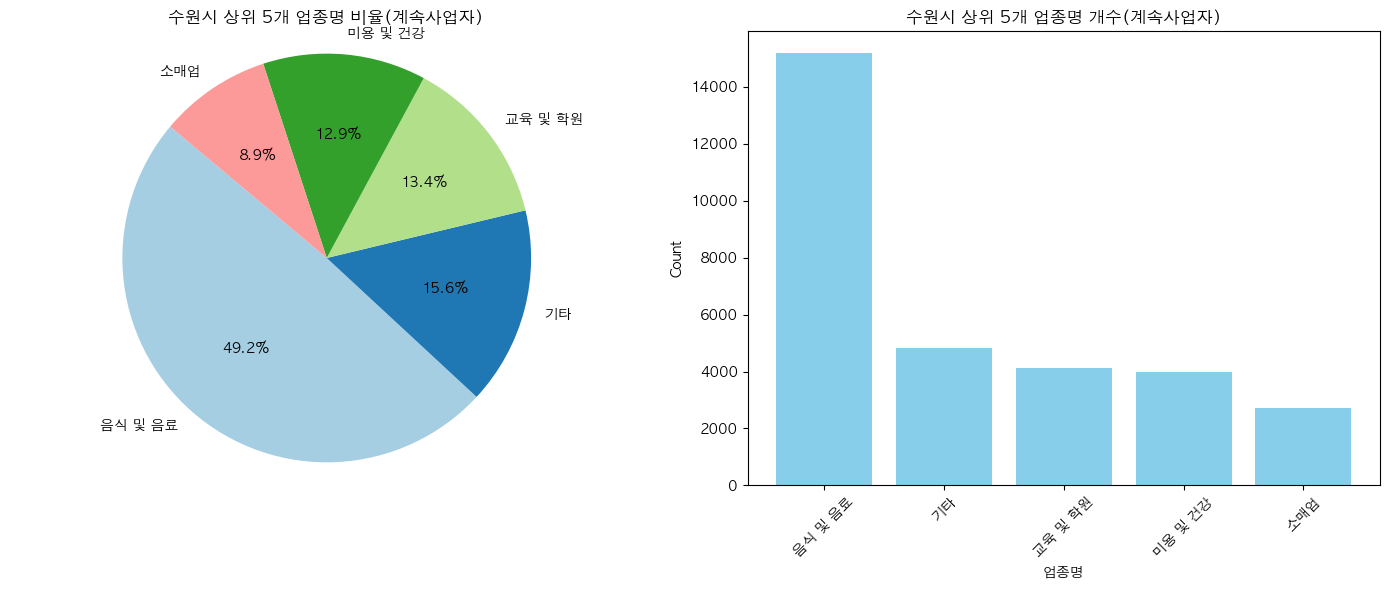

In [47]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 평택시
음식 및 음료    12063
기타          5580
미용 및 건강     2728
교육 및 학원     2071
소매업         1597
Name: 업종명_카테고리, dtype: int64


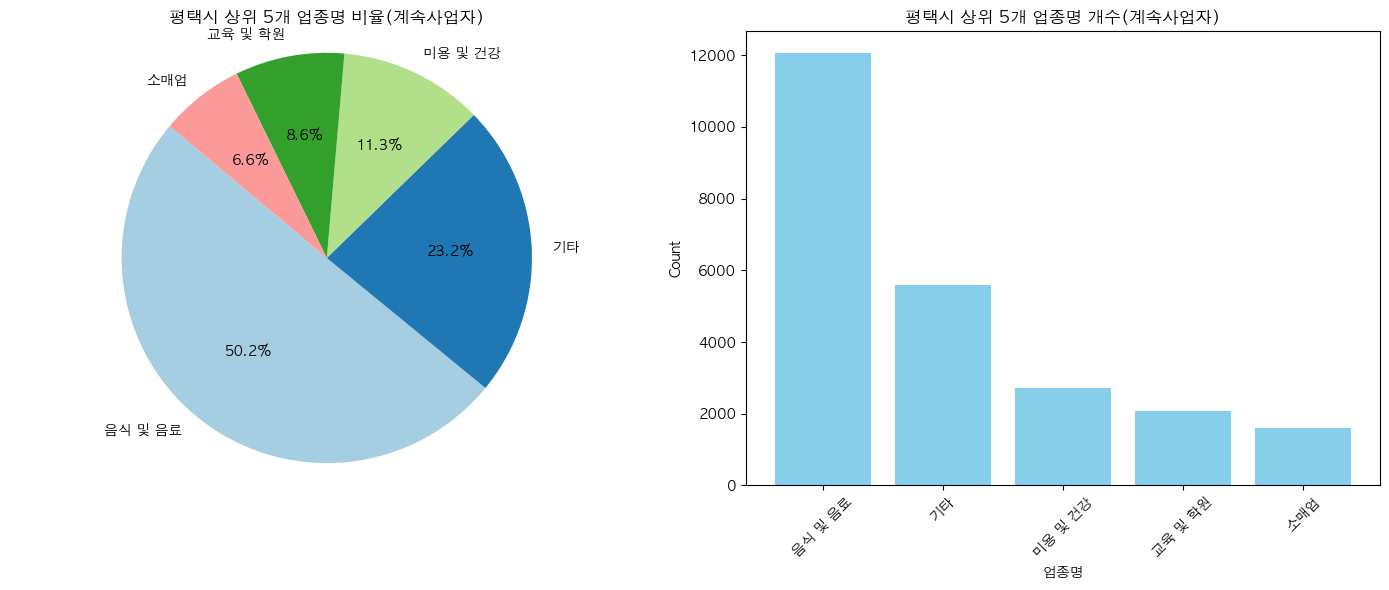

In [48]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 17  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 용인시
음식 및 음료    10470
교육 및 학원     4073
기타          3501
미용 및 건강     2359
소매업         1718
Name: 업종명_카테고리, dtype: int64


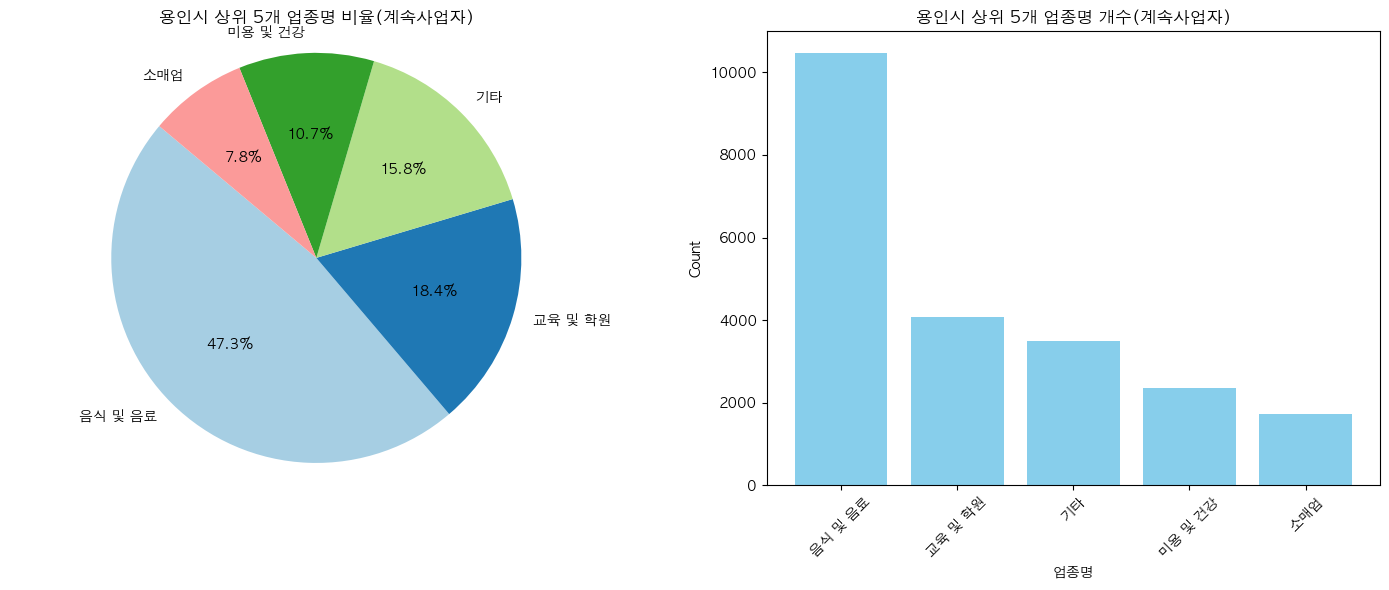

In [49]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 15  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 화성시
음식 및 음료    10852
교육 및 학원     4246
기타          3478
미용 및 건강     2490
소매업         1806
Name: 업종명_카테고리, dtype: int64


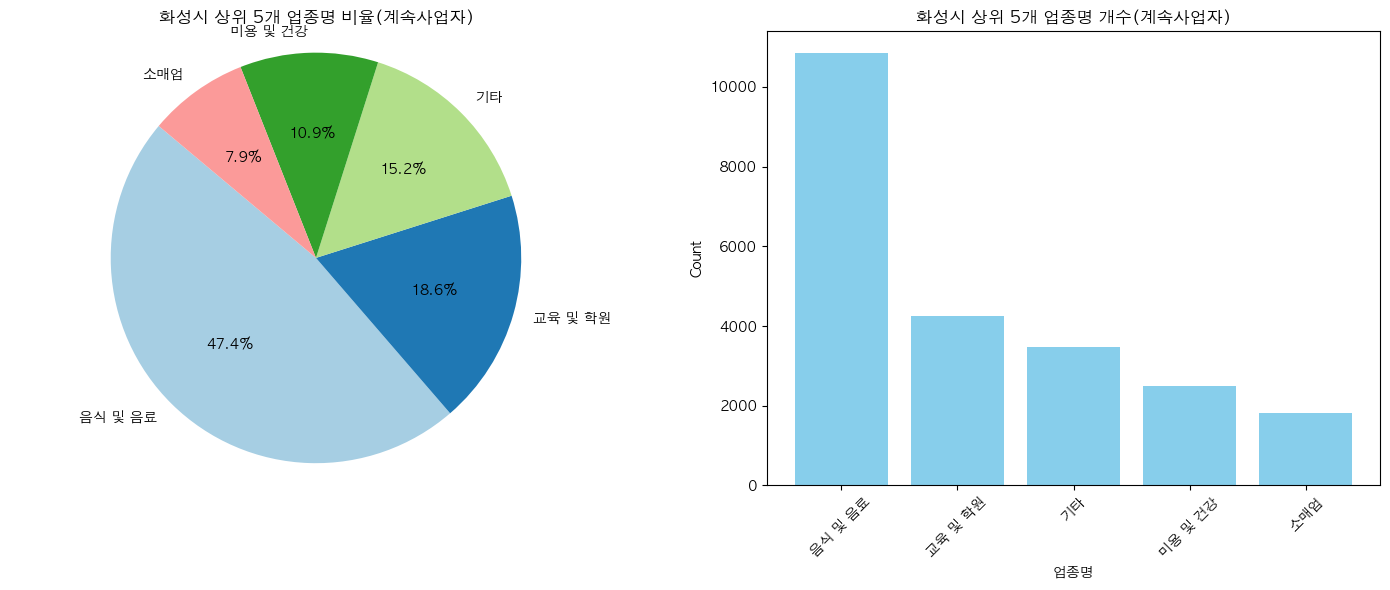

In [50]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 18  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 고양시
음식 및 음료    10037
교육 및 학원     3462
기타          3293
미용 및 건강     2774
소매업         1881
Name: 업종명_카테고리, dtype: int64


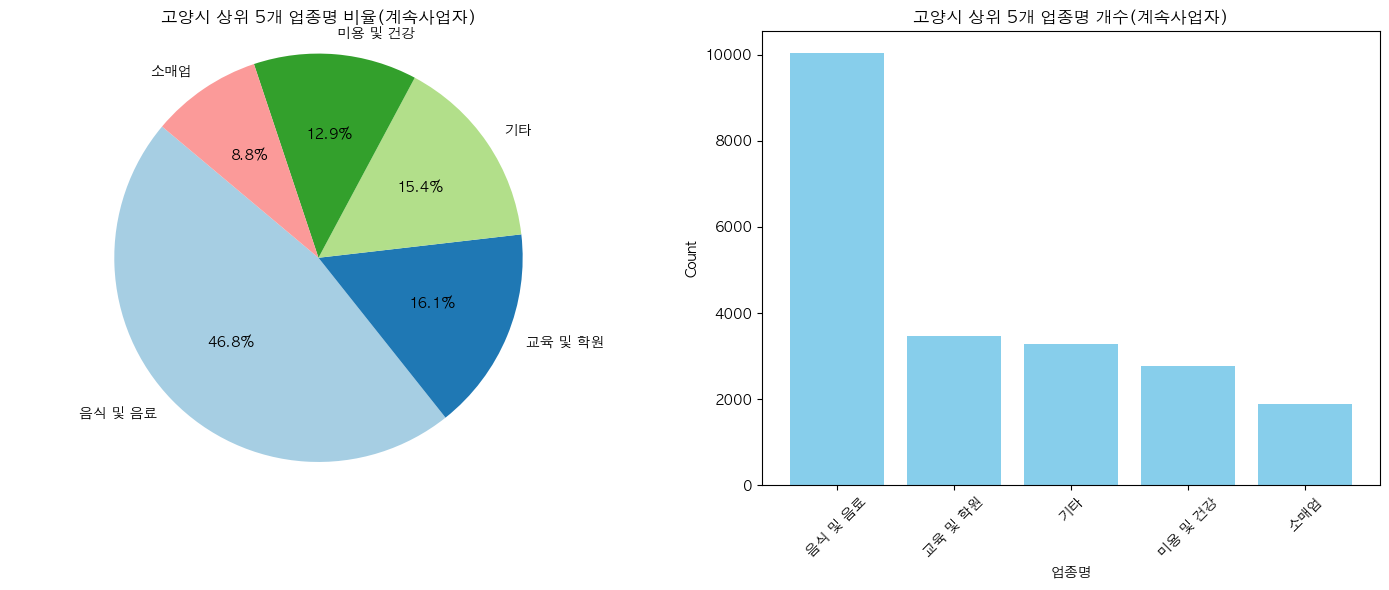

In [51]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 0  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

## 휴폐업상태가 "휴업"인 데이터들만 모아 df3에 저장

In [52]:
# '휴폐업상태' 열의 각 고유 값들의 빈도수를 확인
value_counts = df1['휴폐업상태'].value_counts()

# 빈도수를 출력
print(value_counts)

계속사업자    403391
폐업자       15191
휴업자         168
Name: 휴폐업상태, dtype: int64


In [53]:
# '휴폐업상태'가 '휴업'인 데이터만 필터링하여 df3에 저장
df3 = df1[df1['휴폐업상태'] == '휴업자']

# df3 확인
print(df3.shape)
df3.head()

(168, 8)


,시군명,상호명,업종명,업종코드,휴폐업상태,폐업일자,데이터기준일자,업종명_카테고리
23083,광명시,선진특수렉카,자동차정비,6502,휴업자,NaN,20240331,차량 관련
24200,과천시,소연커피,일반음식점,2301,휴업자,NaN,20240331,음식 및 음료
24823,과천시,삼성씨엔이,가전제품,3101,휴업자,NaN,20240331,소매업
25041,과천시,온유필라테스,"기타레저,스포츠용품",8105,휴업자,NaN,20240331,레저 및 스포츠
25492,광명시,빠레뜨예술공간미술교습소,교육서비스업,1015,휴업자,NaN,20240331,교육 및 학원


In [54]:
df3["시군명"].value_counts()

용인시    46
김포시    40
평택시    34
성남시    26
광명시    14
과천시     4
의왕시     4
Name: 시군명, dtype: int64

In [55]:
# 시군명을 리스트로 저장
city_county_names = df3['시군명'].unique().tolist()

# 특정 시군명의 상위 5개 업종명을 계산하는 함수
def get_top_5_industries_by_city(index):
    city_name = city_county_names[index]
    filtered_df = df1[df1['시군명'] == city_name]
    industry_count = filtered_df['업종명_카테고리'].value_counts()
    top_5_industry_count = industry_count.nlargest(5)
    return top_5_industry_count

In [56]:
import matplotlib.pyplot as plt

def plot_top_5_industries_by_city(index):
    # 특정 시군명의 상위 5개 업종명을 계산
    top_10_industries = get_top_10_industries_by_city(index)
    
    city_name = city_county_names[index]
    
    # 원 그래프
    plt.figure(figsize=(6, 4))
    plt.pie(top_10_industries, labels=top_10_industries.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f"{city_name} 상위 5개 업종명 비율(계속사업자)")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    
    # 막대 그래프
    plt.figure(figsize=(6, 4))
    plt.bar(top_10_industries.index, top_10_industries, color='skyblue')
    plt.xlabel('업종명')
    plt.ylabel('Count')
    plt.title(f"{city_name} 상위 5개 업종명 개수(계속사업자)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## 폐업일자 시군★ 년도 및 월 분석

In [57]:
# 폐업일자 있는 데이터만 남기기
df1_closed = df1[df1['휴폐업상태'] == '폐업자'].copy()

# 폐업일자 날짜정리
df1_closed['폐업일자'] = pd.to_datetime(df1_closed['폐업일자'])
df1_closed['Year'] = df1_closed['폐업일자'].dt.year
df1_closed['Month'] = df1_closed['폐업일자'].dt.month.copy()

df1_closed['폐업일자'] = pd.to_datetime(df1_closed['폐업일자'])
df1_closed['Year'] = df1_closed['폐업일자'].dt.year
df1_closed['Month'] = df1_closed['폐업일자'].dt.month

df1_closed = df1_closed.reset_index()
df1_closed.head()

,index,시군명,상호명,업종명,업종코드,휴폐업상태,폐업일자,데이터기준일자,업종명_카테고리,Year,Month
0,22861,과천시,소박한한끼,식음료(기타),2310,폐업자,2023-01-24,20240331,기타,2023,1
1,22862,과천시,수학세상,교육서비스업,1015,폐업자,2024-01-22,20240331,교육 및 학원,2024,1
2,22864,과천시,윤선생영어숲과천센터,교육서비스업,1015,폐업자,2022-10-04,20240331,교육 및 학원,2022,10
3,22865,과천시,윤선생영어숲과천센터,교육서비스업,1015,폐업자,2022-10-04,20240331,교육 및 학원,2022,10
4,22867,과천시,아.지트(A.ZIT),일반음식점,2301,폐업자,2022-03-31,20240331,음식 및 음료,2022,3


In [58]:
#폐업자가 가장 많은 시군명 top 5
폐업_개수 = df1_closed.groupby(['시군명', '휴폐업상태']).size().reset_index(name='개수')

# 시군명별 총 업종 개수 구하기
시군별_폐업_개수 = 폐업_개수.groupby('시군명')['개수'].sum().reset_index()

# 가장 많은 업종을 가진 상위 5개 시군명 추출
상위5개_시군명폐업 =시군별_폐업_개수.nlargest(5, '개수')['시군명']

# 상위 5개 시군명에 대해 업종별 개수 필터링
상위5개_시군명폐업_개수 = 폐업_개수[폐업_개수['시군명'].isin(상위5개_시군명폐업)]

df1_closed_count = 시군별_폐업_개수.sort_values(by = '시군명') #(상점 수)
df1_closed_count.sort_values(by='개수', ascending = False)

#평택시, 광명시, 용인시, 성남시, 김포시 

,시군명,개수
10,평택시,7902
1,광명시,2745
8,용인시,2180
5,성남시,1143
3,김포시,621
0,과천시,354
9,의왕시,241
6,수원시,2
2,군포시,1
4,남양주시,1


In [59]:
## 평택시 폐업자 분석

# 평택시에 해당하는 행 필터링
df_PT = df1_closed[df1_closed['시군명'] == '평택시']

# 연도와 월별 폐업 빈도수 계산
monthly_closures_PT = df_PT.groupby(['Year', 'Month']).size().unstack(fill_value=0)

print("\n 평택시 연도와 월별 폐업 빈도수:")
monthly_closures_PT


 평택시 연도와 월별 폐업 빈도수:


Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2020,0,0,1,0,0,1,2,3,33,98,114,108
2021,75,71,89,167,153,191,100,151,140,127,156,175
2022,102,92,158,99,115,307,220,221,197,254,193,265
2023,174,187,206,204,246,253,245,225,208,214,195,269
2024,225,234,232,240,167,0,0,0,0,0,0,0


In [60]:
## 광명시 폐업자 분석

# 광명시에 해당하는 행 필터링
df_GM = df1_closed[df1_closed['시군명'] == '광명시']

# 연도와 월별 폐업 빈도수 계산
monthly_closures_GM = df_GM.groupby(['Year', 'Month']).size().unstack(fill_value=0)

print("\n 광명시 연도와 월별 폐업 빈도수:")
monthly_closures_GM


 광명시 연도와 월별 폐업 빈도수:


Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2020,0,0,0,0,0,0,0,0,1,5,14,18
2021,25,21,23,60,47,55,35,53,45,48,61,74
2022,30,36,59,42,37,110,67,67,75,88,99,136
2023,86,105,92,72,79,88,64,73,70,83,72,100
2024,62,65,79,77,47,0,0,0,0,0,0,0


In [61]:
## 용인시 폐업자 분석

# 광명시에 해당하는 행 필터링
df_YI = df1_closed[df1_closed['시군명'] == '용인시']

# 연도와 월별 폐업 빈도수 계산
monthly_closures_YI = df_YI.groupby(['Year', 'Month']).size().unstack(fill_value=0)

print("\n 용인시 연도와 월별 폐업 빈도수:")
monthly_closures_YI


 용인시 연도와 월별 폐업 빈도수:


Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2021,0,1,0,0,0,0,0,0,0,0,0,0
2022,0,0,0,0,0,0,0,0,0,0,0,1
2023,1,0,1,1,1,5,5,22,197,289,254,308
2024,220,215,254,242,163,0,0,0,0,0,0,0


폐업자가 가장 많은 시군명 top3는 평택시>광명시>용인시 였다. 
평택시는 골고루 분포되어 있는 반면 광명시는 연말과 연초에 폐업자가 증가한다. 
(용인시는 이상함)
폐업자가 가장 적을 때 개업을 도모하기. 또는 폐업자가 많을 때 지역화폐 인센티브 높이기.

### df1에서 휴폐업상태가 폐업인 데이터만 모아 df3에 저장 후 시각화를 해보자

In [90]:
# '휴폐업상태' 열의 각 고유 값들의 빈도수를 확인
value_counts = df1['휴폐업상태'].value_counts()

# 빈도수를 출력
print(value_counts)

계속사업자    403391
폐업자       15191
휴업자         168
Name: 휴폐업상태, dtype: int64


In [91]:
# '휴폐업상태'가 '휴업'인 데이터만 필터링하여 df3에 저장
df3 = df1[df1['휴폐업상태'] == '폐업자']

# df3 확인
print(df3.shape)
df3.head()

(15191, 8)


,시군명,상호명,업종명,업종코드,휴폐업상태,폐업일자,데이터기준일자,업종명_카테고리
22861,과천시,소박한한끼,식음료(기타),2310,폐업자,20230124,20240331,기타
22862,과천시,수학세상,교육서비스업,1015,폐업자,20240122,20240331,교육 및 학원
22864,과천시,윤선생영어숲과천센터,교육서비스업,1015,폐업자,20221004,20240331,교육 및 학원
22865,과천시,윤선생영어숲과천센터,교육서비스업,1015,폐업자,20221004,20240331,교육 및 학원
22867,과천시,아.지트(A.ZIT),일반음식점,2301,폐업자,20220331,20240331,음식 및 음료


In [92]:
df3["시군명"].value_counts()

평택시     7902
광명시     2745
용인시     2180
성남시     1143
김포시      621
과천시      354
의왕시      241
수원시        2
군포시        1
여주시        1
남양주시       1
Name: 시군명, dtype: int64

### 표본이 적은 수원, 군포, 여주, 남양주는 제외하자.

In [93]:
# 자르고 싶은 시군명을 리스트로 저장
exclude_cities = ['수원시', '군포시', '여주시', '남양주시']

# '시군명' 열의 값이 exclude_cities에 포함되지 않은 행만 필터링하여 df3에 저장
df3_filtered = df3[~df3['시군명'].isin(exclude_cities)]

# 결과 확인
print(df3_filtered['시군명'].value_counts())
print(df3_filtered.shape)

평택시    7902
광명시    2745
용인시    2180
성남시    1143
김포시     621
과천시     354
의왕시     241
Name: 시군명, dtype: int64
(15186, 8)


In [113]:
# 시군명을 리스트로 저장
city_county_names = df3_filtered['시군명'].unique().tolist()

# 특정 시군명의 상위 5개 업종명을 계산하는 함수
def get_top_5_industries_by_city(index):
    city_name = city_county_names[index]
    filtered_df = df3_filtered[df3_filtered['시군명'] == city_name]
    industry_count = filtered_df['업종명_카테고리'].value_counts()
    top_5_industry_count = industry_count.nlargest(5)
    return top_5_industry_count

In [114]:
import matplotlib.pyplot as plt

def plot_top_5_industries_by_city(index):
    # 특정 시군명의 상위 5개 업종명을 계산
    top_5_industries = get_top_5_industries_by_city(index)
    
    city_name = city_county_names[index]
    
    # 서브플롯 설정: 1행 2열, 가로로 배치
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1행 2열, 화면 크기 조정
    
    # 원 그래프
    axes[0].pie(top_5_industries, labels=top_5_industries.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    axes[0].set_title(f"{city_name} 상위 5개 업종명 비율(폐업자)")
    axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    # 막대 그래프
    axes[1].bar(top_5_industries.index, top_5_industries, color='skyblue')
    axes[1].set_xlabel('업종명')
    axes[1].set_ylabel('Count')
    axes[1].set_title(f"{city_name} 상위 5개 업종명 개수(폐업자)")
    axes[1].tick_params(axis='x', rotation=45)  # X축 레이블 회전

    plt.tight_layout()  # 플롯 간격 자동 조정
    plt.show()

In [115]:
# 한글 글꼴 설정 (macOS에서 사용 가능한 한글 글꼴)
font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"  # macOS에서 'AppleGothic' 글꼴을 사용합니다
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

City/County: 광명시
음식 및 음료     1202
기타           527
교육 및 학원      311
미용 및 건강      241
레저 및 스포츠     162
Name: 업종명_카테고리, dtype: int64


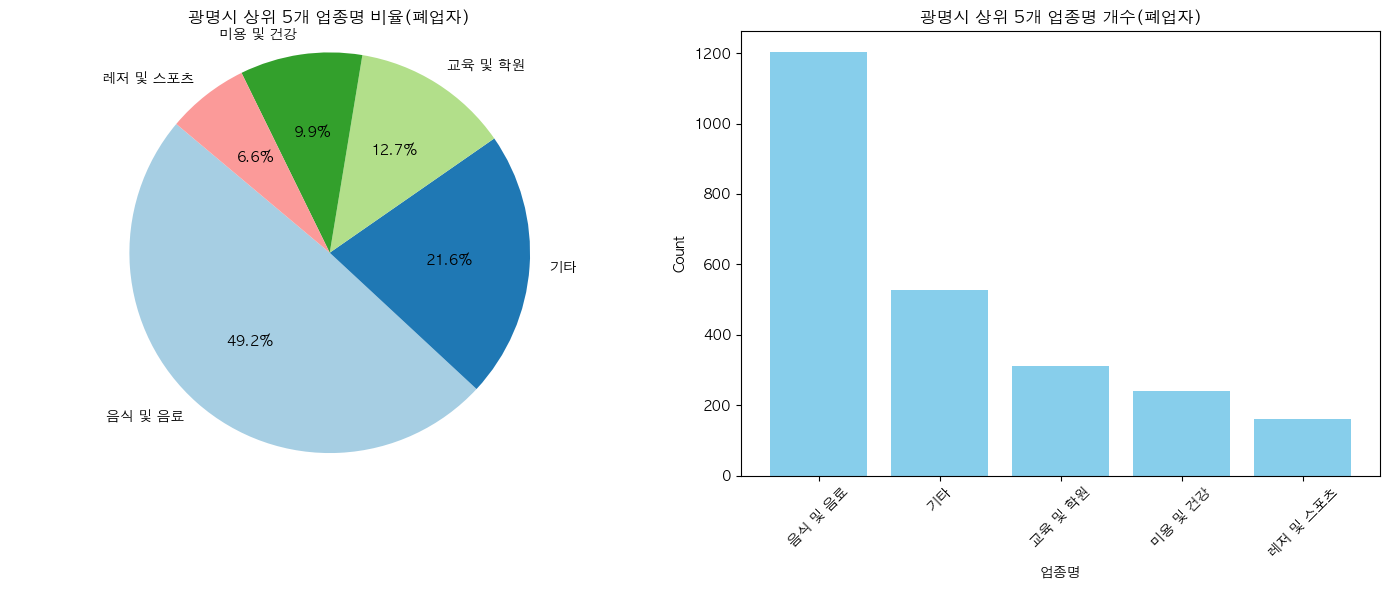

In [117]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 1  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 김포시
음식 및 음료    193
기타         169
소매업         88
의료 및 보건     37
미용 및 건강     36
Name: 업종명_카테고리, dtype: int64


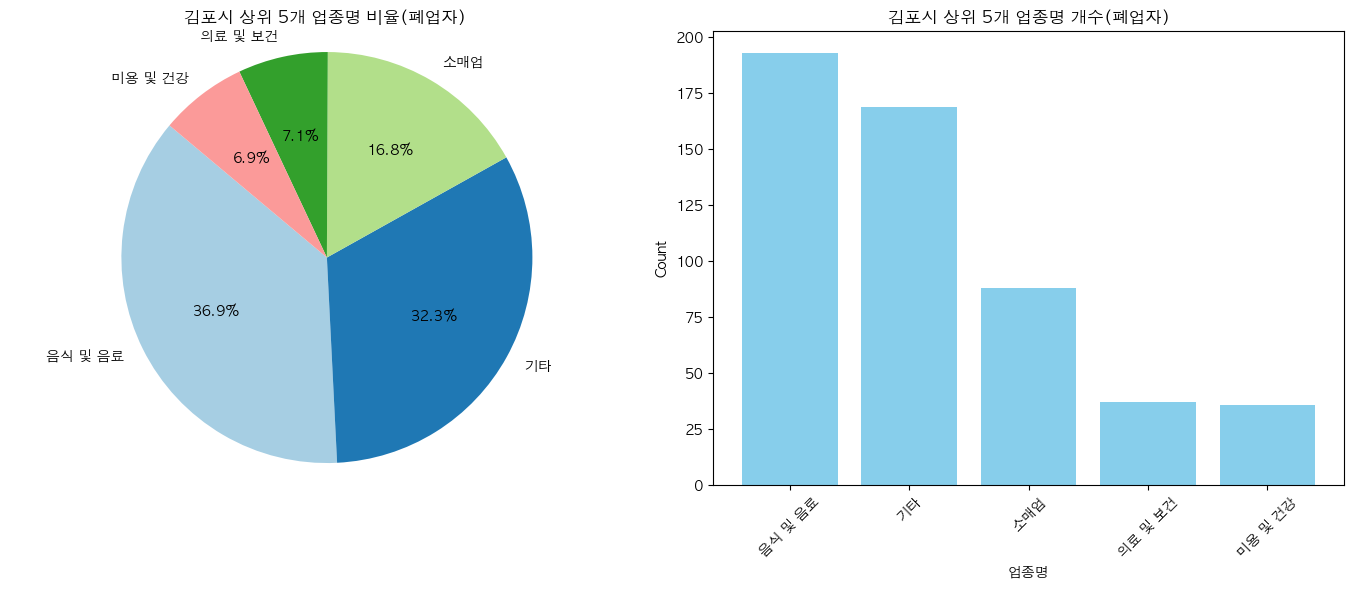

In [118]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 2  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 성남시
음식 및 음료    579
기타         202
교육 및 학원    127
미용 및 건강     93
소매업         78
Name: 업종명_카테고리, dtype: int64


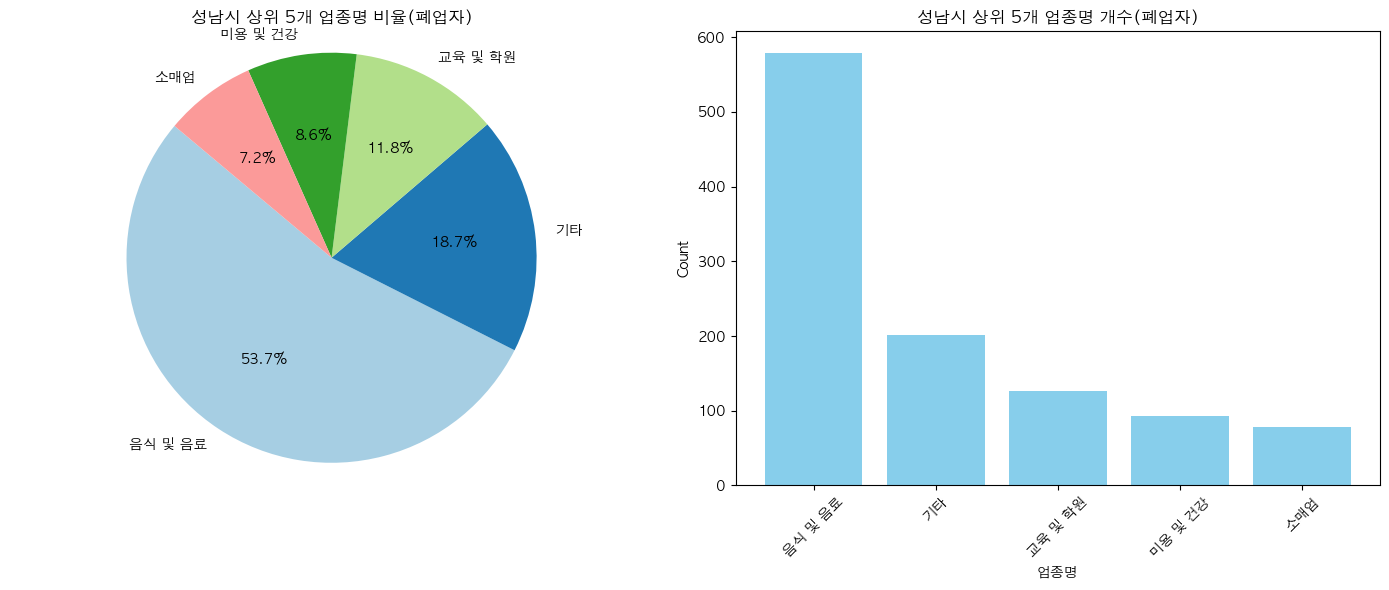

In [119]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 3  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 평택시
음식 및 음료    4404
기타         1492
미용 및 건강     507
교육 및 학원     373
소매업         339
Name: 업종명_카테고리, dtype: int64


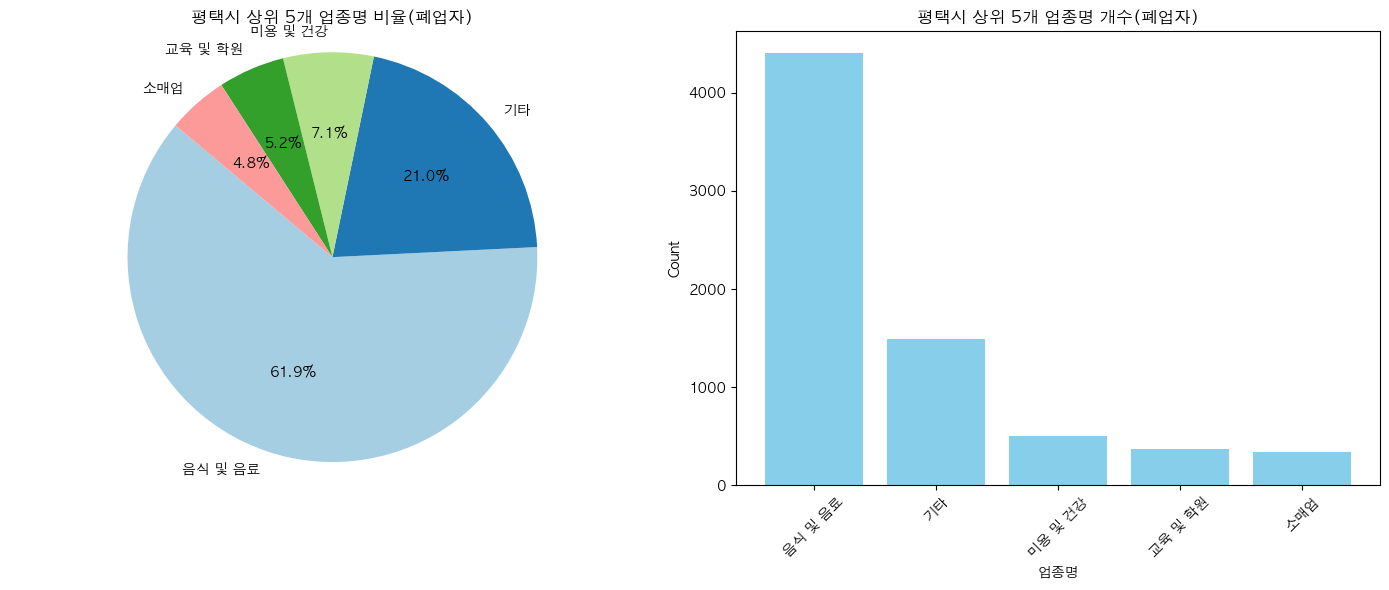

In [120]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 4  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)

City/County: 용인시
음식 및 음료    1159
교육 및 학원     313
기타          236
소매업         112
미용 및 건강     103
Name: 업종명_카테고리, dtype: int64


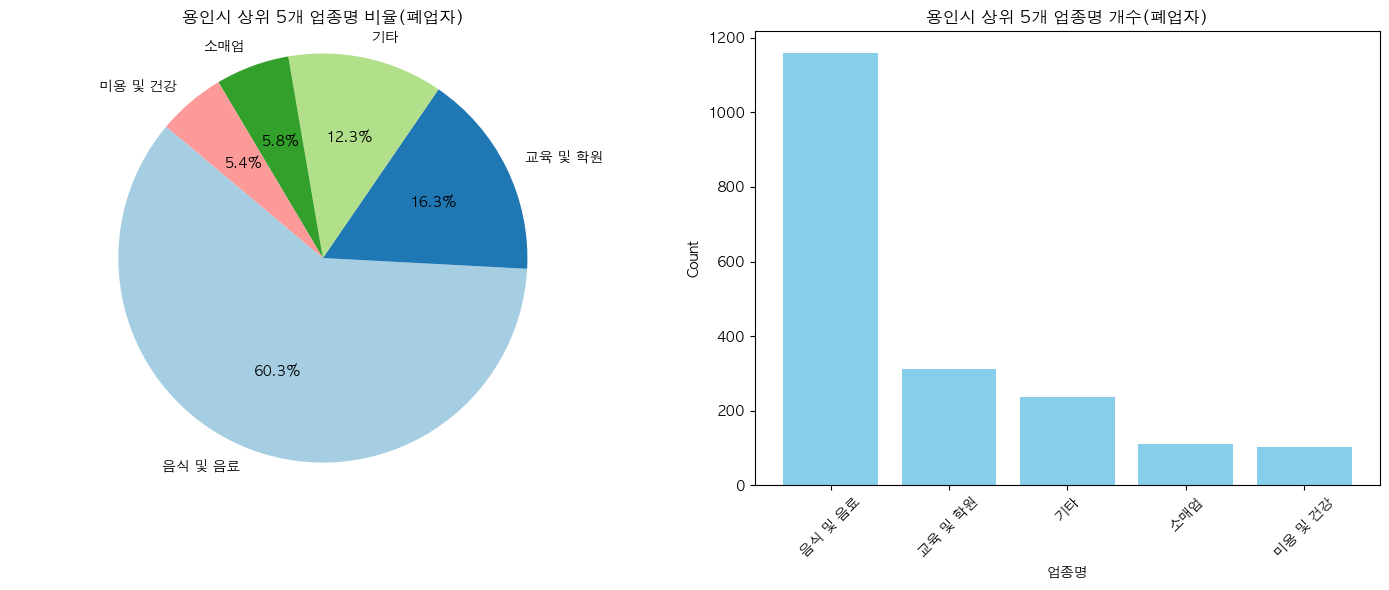

In [121]:
# 예를 들어, 인덱스 0에 해당하는 시군명의 업종명별 개수를 확인하고 정렬된 결과를 출력
index = 5  # 원하는 시군명의 인덱스 번호
sorted_industry_counts = get_top_5_industries_by_city(index)

# 출력
print(f"City/County: {city_county_names[index]}")
print(sorted_industry_counts)

# 예를 들어, 인덱스 0에 해당하는 시군명의 상위 10개 업종명 시각화
plot_top_5_industries_by_city(index)